In [115]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import sqlite3



In [117]:
#Loading and Exploring Data

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Mall Customer Segmentation Analysis/Mall_Customers.csv')

# Display the first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [118]:
#Data Preprocessing

# Check for missing values
print(df.isnull().sum())

# Drop irrelevant columns
df = df.drop(['CustomerID'], axis=1)

# Quick summary of the data
print(df.describe())




CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


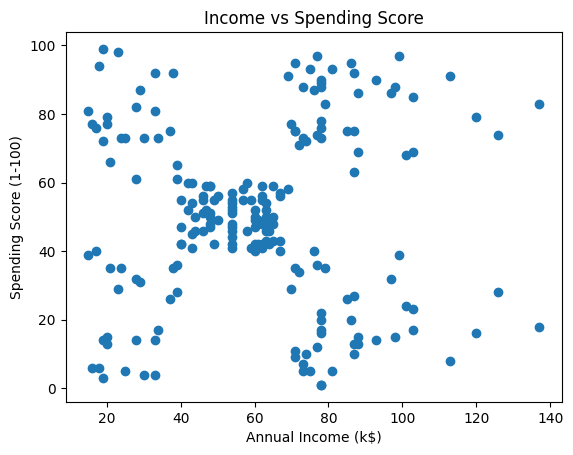

In [119]:
# Visualizing data distribution for Annual Income and Spending Score
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score')
plt.show()

**K-Means Clustering**

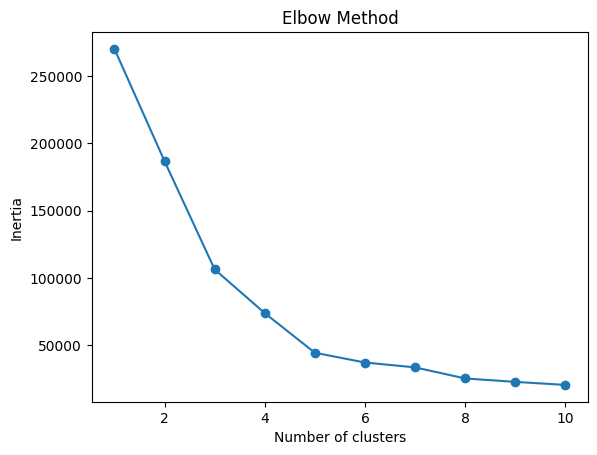

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        3
1    Male   21                  15                      81        1
2  Female   20                  16                       6        3
3  Female   23                  16                      77        1
4  Female   31                  17                      40        3


In [120]:

# perform clustering to segment customers into groups.

# We are using 'Annual Income' and 'Spending Score' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Using the Elbow method to determine the optimal number of clusters (K)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow curve, let's choose K=5
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(X)

# Display the resulting clusters
print(df.head())


In [121]:
import sqlite3

# Create a SQLite database
conn = sqlite3.connect('customer_segmentation_.db')
cursor = conn.cursor()

# Drop the table if it exists
cursor.execute('DROP TABLE IF EXISTS customer_segment')

# Create a table in the database
cursor.execute('''
CREATE TABLE IF NOT EXISTS customer_segment (
    CustomerID INTEGER PRIMARY KEY AUTOINCREMENT, -- Set CustomerID to autoincrement
    Gender TEXT,
    Age INTEGER,
    AnnualIncome INTEGER,
    SpendingScore INTEGER,
    Cluster INTEGER
)
''')

# Insert data into the table
for index, row in df.iterrows():
    cursor.execute('''
    INSERT INTO customer_segment (Gender, Age, AnnualIncome, SpendingScore, Cluster)
    VALUES (?, ?, ?, ?, ?)
    ''', (row['Gender'], row['Age'], row['Annual Income (k$)'], row['Spending Score (1-100)'], row['Cluster']))

# Commit the changes and close the connection
conn.commit()
# conn.close()

In [122]:
# Querying the SQL Database


# Query the database to get the number of customers in each cluster
cursor.execute('SELECT Cluster, COUNT(*) FROM customer_segment GROUP BY Cluster')
clusters = cursor.fetchall()

for cluster in clusters:
    print(f"Cluster {cluster[0]}: {cluster[1]} customers")

# Example of querying a specific cluster
cursor.execute('SELECT * FROM customer_segment WHERE Cluster = 2')
customers_in_cluster_2 = cursor.fetchall()
for customer in customers_in_cluster_2:
    print(customer)

conn.close()


Cluster 0: 36 customers
Cluster 1: 22 customers
Cluster 2: 80 customers
Cluster 3: 23 customers
Cluster 4: 39 customers
(44, 'Female', 31, 39, 61, 2)
(47, 'Female', 50, 40, 55, 2)
(48, 'Female', 27, 40, 47, 2)
(49, 'Female', 29, 40, 42, 2)
(50, 'Female', 31, 40, 42, 2)
(51, 'Female', 49, 42, 52, 2)
(52, 'Male', 33, 42, 60, 2)
(53, 'Female', 31, 43, 54, 2)
(54, 'Male', 59, 43, 60, 2)
(55, 'Female', 50, 43, 45, 2)
(56, 'Male', 47, 43, 41, 2)
(57, 'Female', 51, 44, 50, 2)
(58, 'Male', 69, 44, 46, 2)
(59, 'Female', 27, 46, 51, 2)
(60, 'Male', 53, 46, 46, 2)
(61, 'Male', 70, 46, 56, 2)
(62, 'Male', 19, 46, 55, 2)
(63, 'Female', 67, 47, 52, 2)
(64, 'Female', 54, 47, 59, 2)
(65, 'Male', 63, 48, 51, 2)
(66, 'Male', 18, 48, 59, 2)
(67, 'Female', 43, 48, 50, 2)
(68, 'Female', 68, 48, 48, 2)
(69, 'Male', 19, 48, 59, 2)
(70, 'Female', 32, 48, 47, 2)
(71, 'Male', 70, 49, 55, 2)
(72, 'Female', 47, 49, 42, 2)
(73, 'Female', 60, 50, 49, 2)
(74, 'Female', 60, 50, 56, 2)
(75, 'Male', 59, 54, 47, 2)
(76,

**1. Visualizing Clusters in 2D (Income vs. Spending Score)**


As Annual Income and Spending Score as the features for clustering, we can plot these two features and color-code the points based on their assigned cluster.

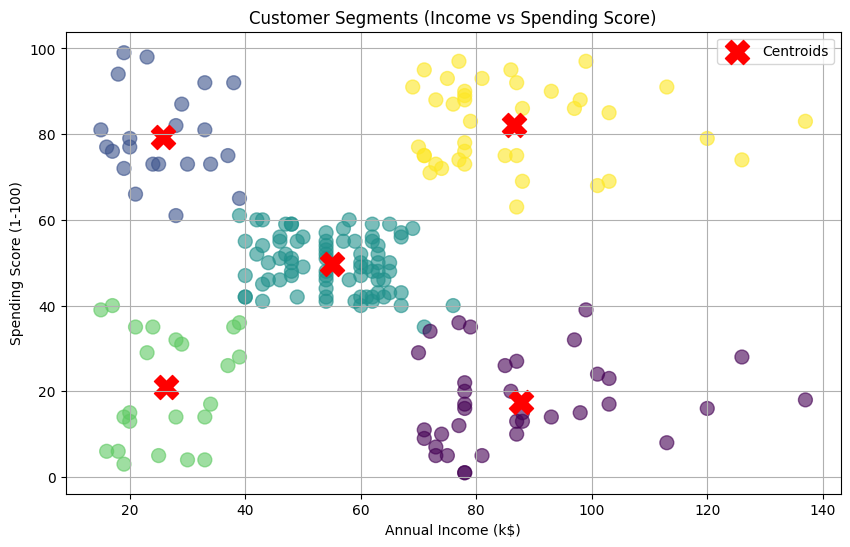

In [123]:
# Create a scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)

# Adding centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Customer Segments (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()



**Visualizing the Distribution of Customers by Age, Income, and Spending Score**

**Histogram of Annual Income Distribution by Cluster**

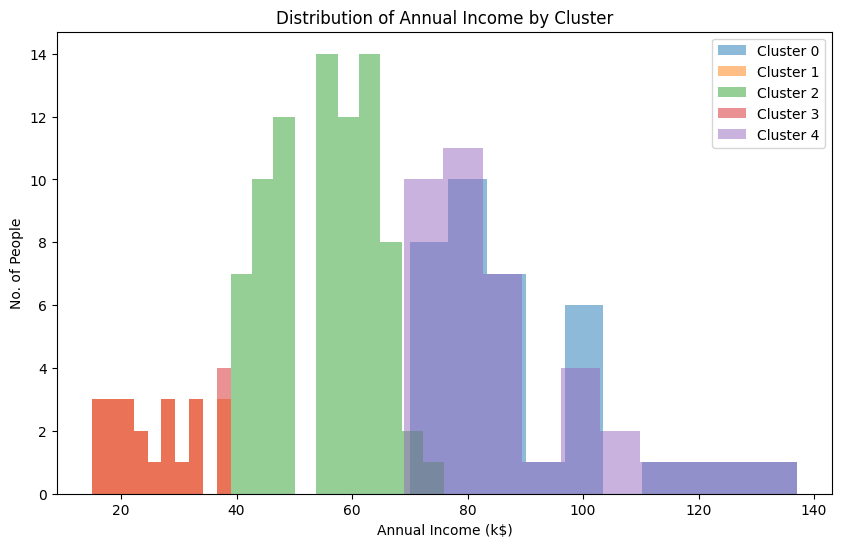

In [124]:
# Plot histogram of Annual Income distribution across clusters
plt.figure(figsize=(10, 6))
for i in range(5):  # Assuming K=5 clusters
    plt.hist(df[df['Cluster'] == i]['Annual Income (k$)'], bins=10, alpha=0.5, label=f'Cluster {i}')

plt.title('Distribution of Annual Income by Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('No. of People')
plt.legend()
plt.show()


**Histogram of Spending Score Distribution by Cluster**

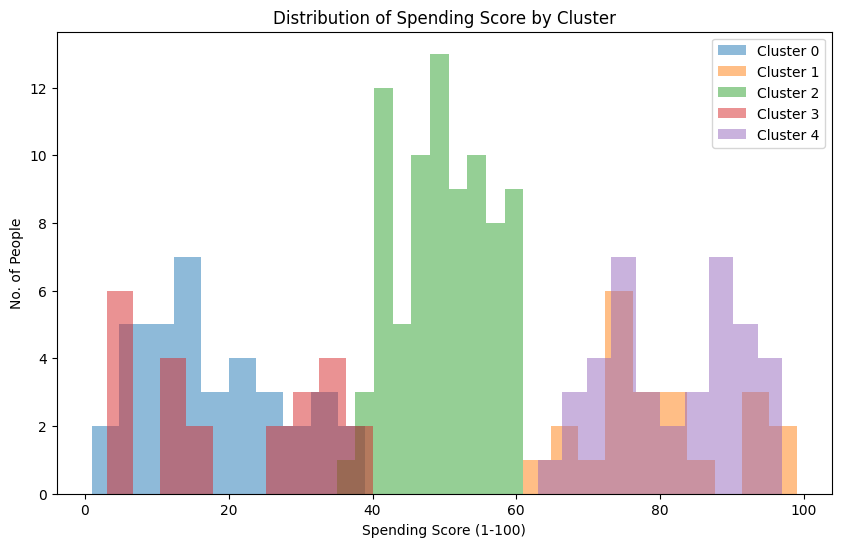

In [125]:
# Plot histogram of Spending Score distribution across clusters
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.hist(df[df['Cluster'] == i]['Spending Score (1-100)'], bins=10, alpha=0.5, label=f'Cluster {i}')

plt.title('Distribution of Spending Score by Cluster')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('No. of People')
plt.legend()
plt.show()


**Box Plot of Age Distribution by Cluster**

<Figure size 1000x600 with 0 Axes>

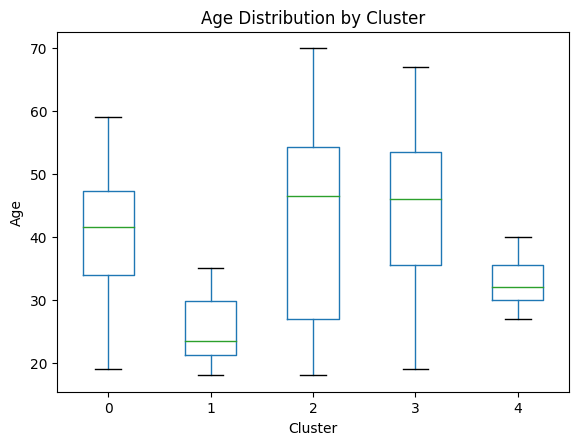

In [126]:
# Boxplot to visualize the age distribution by cluster
plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Cluster', grid=False, showfliers=False)
plt.title('Age Distribution by Cluster')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


**Comparisions Among the Clusters**

In [127]:

# We'll use only 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


# Fit the model and predict the clusters
df['Cluster'] = kmeans.fit_predict(X)

# Get the centroids (cluster centers)
centroids = kmeans.cluster_centers_

# Convert centroids into a DataFrame for easy comparison
centroids_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df['Cluster'] = centroids_df.index
centroids_df = centroids_df.set_index('Cluster')

# Display the centroids DataFrame (Cluster Comparison Table)
print(centroids_df)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 26.304348               20.913043
1                 55.296296               49.518519
2                 88.200000               17.114286
3                 25.727273               79.363636
4                 86.538462               82.128205


bar chart to visualize the average Annual Income and Spending Score for each cluster

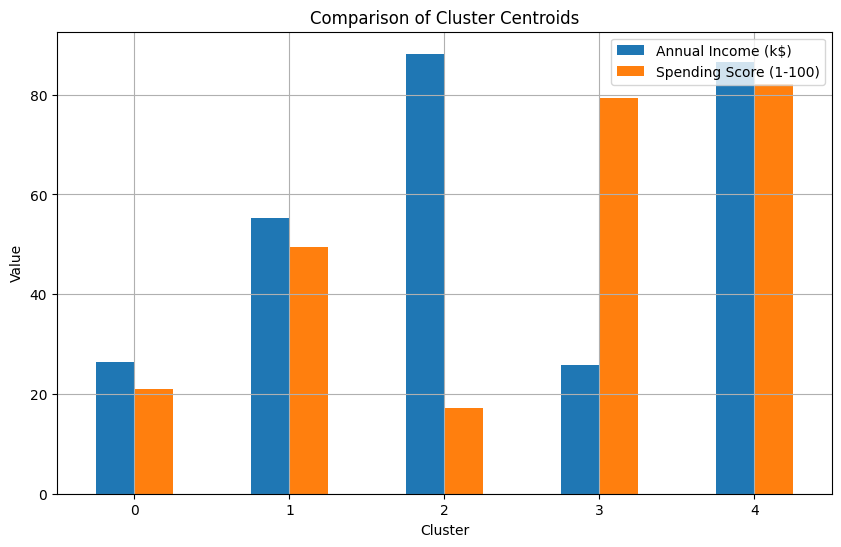

In [129]:
import matplotlib.pyplot as plt

# Plot the centroids of each cluster for Annual Income and Spending Score
centroids_df.plot(kind='bar', figsize=(10, 6))

plt.title('Comparison of Cluster Centroids')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(["Annual Income (k$)", "Spending Score (1-100)"], loc='upper right')
plt.grid(True)
plt.show()


**CONCLUSION**

After Analysis We can say that:

**Cluster 0** : **Low-Income, Low-Spending Customers**


**Cluster 1**  **Middle-Income, Average-Spending Customers.**


**Cluster 2** **High-Income, Low-Spending Customers**


**Cluster 3**  **Low-Income, High-Spending Customers**


**Cluster 4** **High-Income, High-Spending Customers**